In [31]:
# Import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Sort by Month (ISPA)

In [32]:
# Add csv file
df_ispa = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/skripsi fix/allvar_ispa.csv')
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  300 non-null    int64  
 1   KABKOT      300 non-null    object 
 2   month       300 non-null    int64  
 3   year        300 non-null    int64  
 4   longitude   300 non-null    float64
 5   latitude    300 non-null    float64
 6   pm2p5       300 non-null    float64
 7   time        300 non-null    object 
 8   RH          300 non-null    float64
 9   t2m         300 non-null    float64
 10  tp          300 non-null    float64
 11  ispa        300 non-null    int64  
 12  pm10        300 non-null    float64
 13  so2         300 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 32.9+ KB


In [33]:
# Drop the columns
df_ispa = df_ispa.drop(['Unnamed: 0', 'RH', 'so2', 'pm10', 'pm2p5', 'tp', 't2m'], axis=1)

In [34]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   KABKOT     300 non-null    object 
 1   month      300 non-null    int64  
 2   year       300 non-null    int64  
 3   longitude  300 non-null    float64
 4   latitude   300 non-null    float64
 5   time       300 non-null    object 
 6   ispa       300 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 16.5+ KB


In [35]:
# Filter for years 2018-2022
data_ispa = df_ispa[(df_ispa['year'] >= 2018) & (df_ispa['year'] <= 2022)]

# Group sum_ispa by KABKOT, month, and time
ispa_sort = data_ispa.groupby(['KABKOT', 'month', 'time'])['ispa'].sum()
ispa_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    35036
                      2019-01-01     1688
                      2020-01-01    30245
                      2021-01-01     8616
                      2022-01-01    19330
                                    ...  
JAKARTA UTARA  12     2018-12-01     9376
                      2019-12-01    31251
                      2020-12-01     6555
                      2021-12-01    11270
                      2022-12-01    25644
Name: ispa, Length: 300, dtype: int64

Sort by Month (PM10)

In [36]:
# Add csv file
df_so2= pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/skripsi fix/allvar_ispa.csv')
df_so2 = df_so2.drop(['Unnamed: 0', 'ispa', 't2m', 'RH', 'pm10', 'pm2p5', 'tp'], axis=1)
df_so2

,KABKOT,month,year,longitude,latitude,time,so2
0,JAKARTA BARAT,1,2018,106.750000,-6.158333,2018-01-01,3.282244
1,JAKARTA BARAT,2,2018,106.750000,-6.158333,2018-02-01,3.608457
2,JAKARTA BARAT,3,2018,106.750000,-6.158333,2018-03-01,4.557899
3,JAKARTA BARAT,4,2018,106.750000,-6.158333,2018-04-01,5.501254
4,JAKARTA BARAT,5,2018,106.750000,-6.158333,2018-05-01,6.098758
...,...,...,...,...,...,...,...
295,JAKARTA UTARA,8,2022,106.891667,-6.125000,2022-08-01,5.413889
296,JAKARTA UTARA,9,2022,106.891667,-6.125000,2022-09-01,5.163605
297,JAKARTA UTARA,10,2022,106.891667,-6.125000,2022-10-01,4.771141
298,JAKARTA UTARA,11,2022,106.891667,-6.125000,2022-11-01,4.642301


In [37]:
# Filter for years 2018-2022
data_so2= df_so2[(df_so2['year'] >= 2018) & (df_so2['year'] <= 2022)]

# Group mean_RH by KABKOT, month, and time
so2_sort = data_so2.groupby(['KABKOT', 'month', 'time'])['so2'].mean()
so2_sort

KABKOT         month  time      
JAKARTA BARAT  1      2018-01-01    3.282244
                      2019-01-01    3.794546
                      2020-01-01    3.886676
                      2021-01-01    3.883337
                      2022-01-01    4.047353
                                      ...   
JAKARTA UTARA  12     2018-12-01    3.804287
                      2019-12-01    4.079590
                      2020-12-01    3.382975
                      2021-12-01    4.220228
                      2022-12-01    3.910819
Name: so2, Length: 300, dtype: float64

Merge ISPA and pm2p5 (sorted)

In [38]:
merge_ispa_so2 = pd.merge(ispa_sort, so2_sort, on=['KABKOT','month','time'])
merge_ispa_so2

ispa       so2
KABKOT        month time                       
JAKARTA BARAT 1     2018-01-01  35036  3.282244
                    2019-01-01   1688  3.794546
                    2020-01-01  30245  3.886676
                    2021-01-01   8616  3.883337
                    2022-01-01  19330  4.047353
...                               ...       ...
JAKARTA UTARA 12    2018-12-01   9376  3.804287
                    2019-12-01  31251  4.079590
                    2020-12-01   6555  3.382975
                    2021-12-01  11270  4.220228
                    2022-12-01  25644  3.910819

[300 rows x 2 columns]

In [39]:
overlay = merge_ispa_so2.groupby(['KABKOT', 'month']).agg({'ispa':'sum', 'so2':'mean'}).reset_index()
# reset_index() untuk memisahkan kolom KABKOT dan month

# rename columns
overlay = overlay.rename(columns={'ispa': 'sum_ispa', 'so2':'mean_so2'})

In [40]:
overlay

,KABKOT,month,sum_ispa,mean_so2
0,JAKARTA BARAT,1,94915,3.778831
1,JAKARTA BARAT,2,61569,3.644597
2,JAKARTA BARAT,3,56608,4.809099
3,JAKARTA BARAT,4,39893,5.641621
4,JAKARTA BARAT,5,31488,6.278780
5,JAKARTA BARAT,6,41114,6.101910
6,JAKARTA BARAT,7,36988,6.215066
7,JAKARTA BARAT,8,39798,5.452665
8,JAKARTA BARAT,9,48285,5.189886
9,JAKARTA BARAT,10,57399,4.954241


Rename month for month_name

In [41]:
import calendar

# Format for monthly graph
overlay['month'] = pd.to_datetime(overlay['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
overlay= overlay.set_index('month').reset_index()

Plot ISPA x t2m

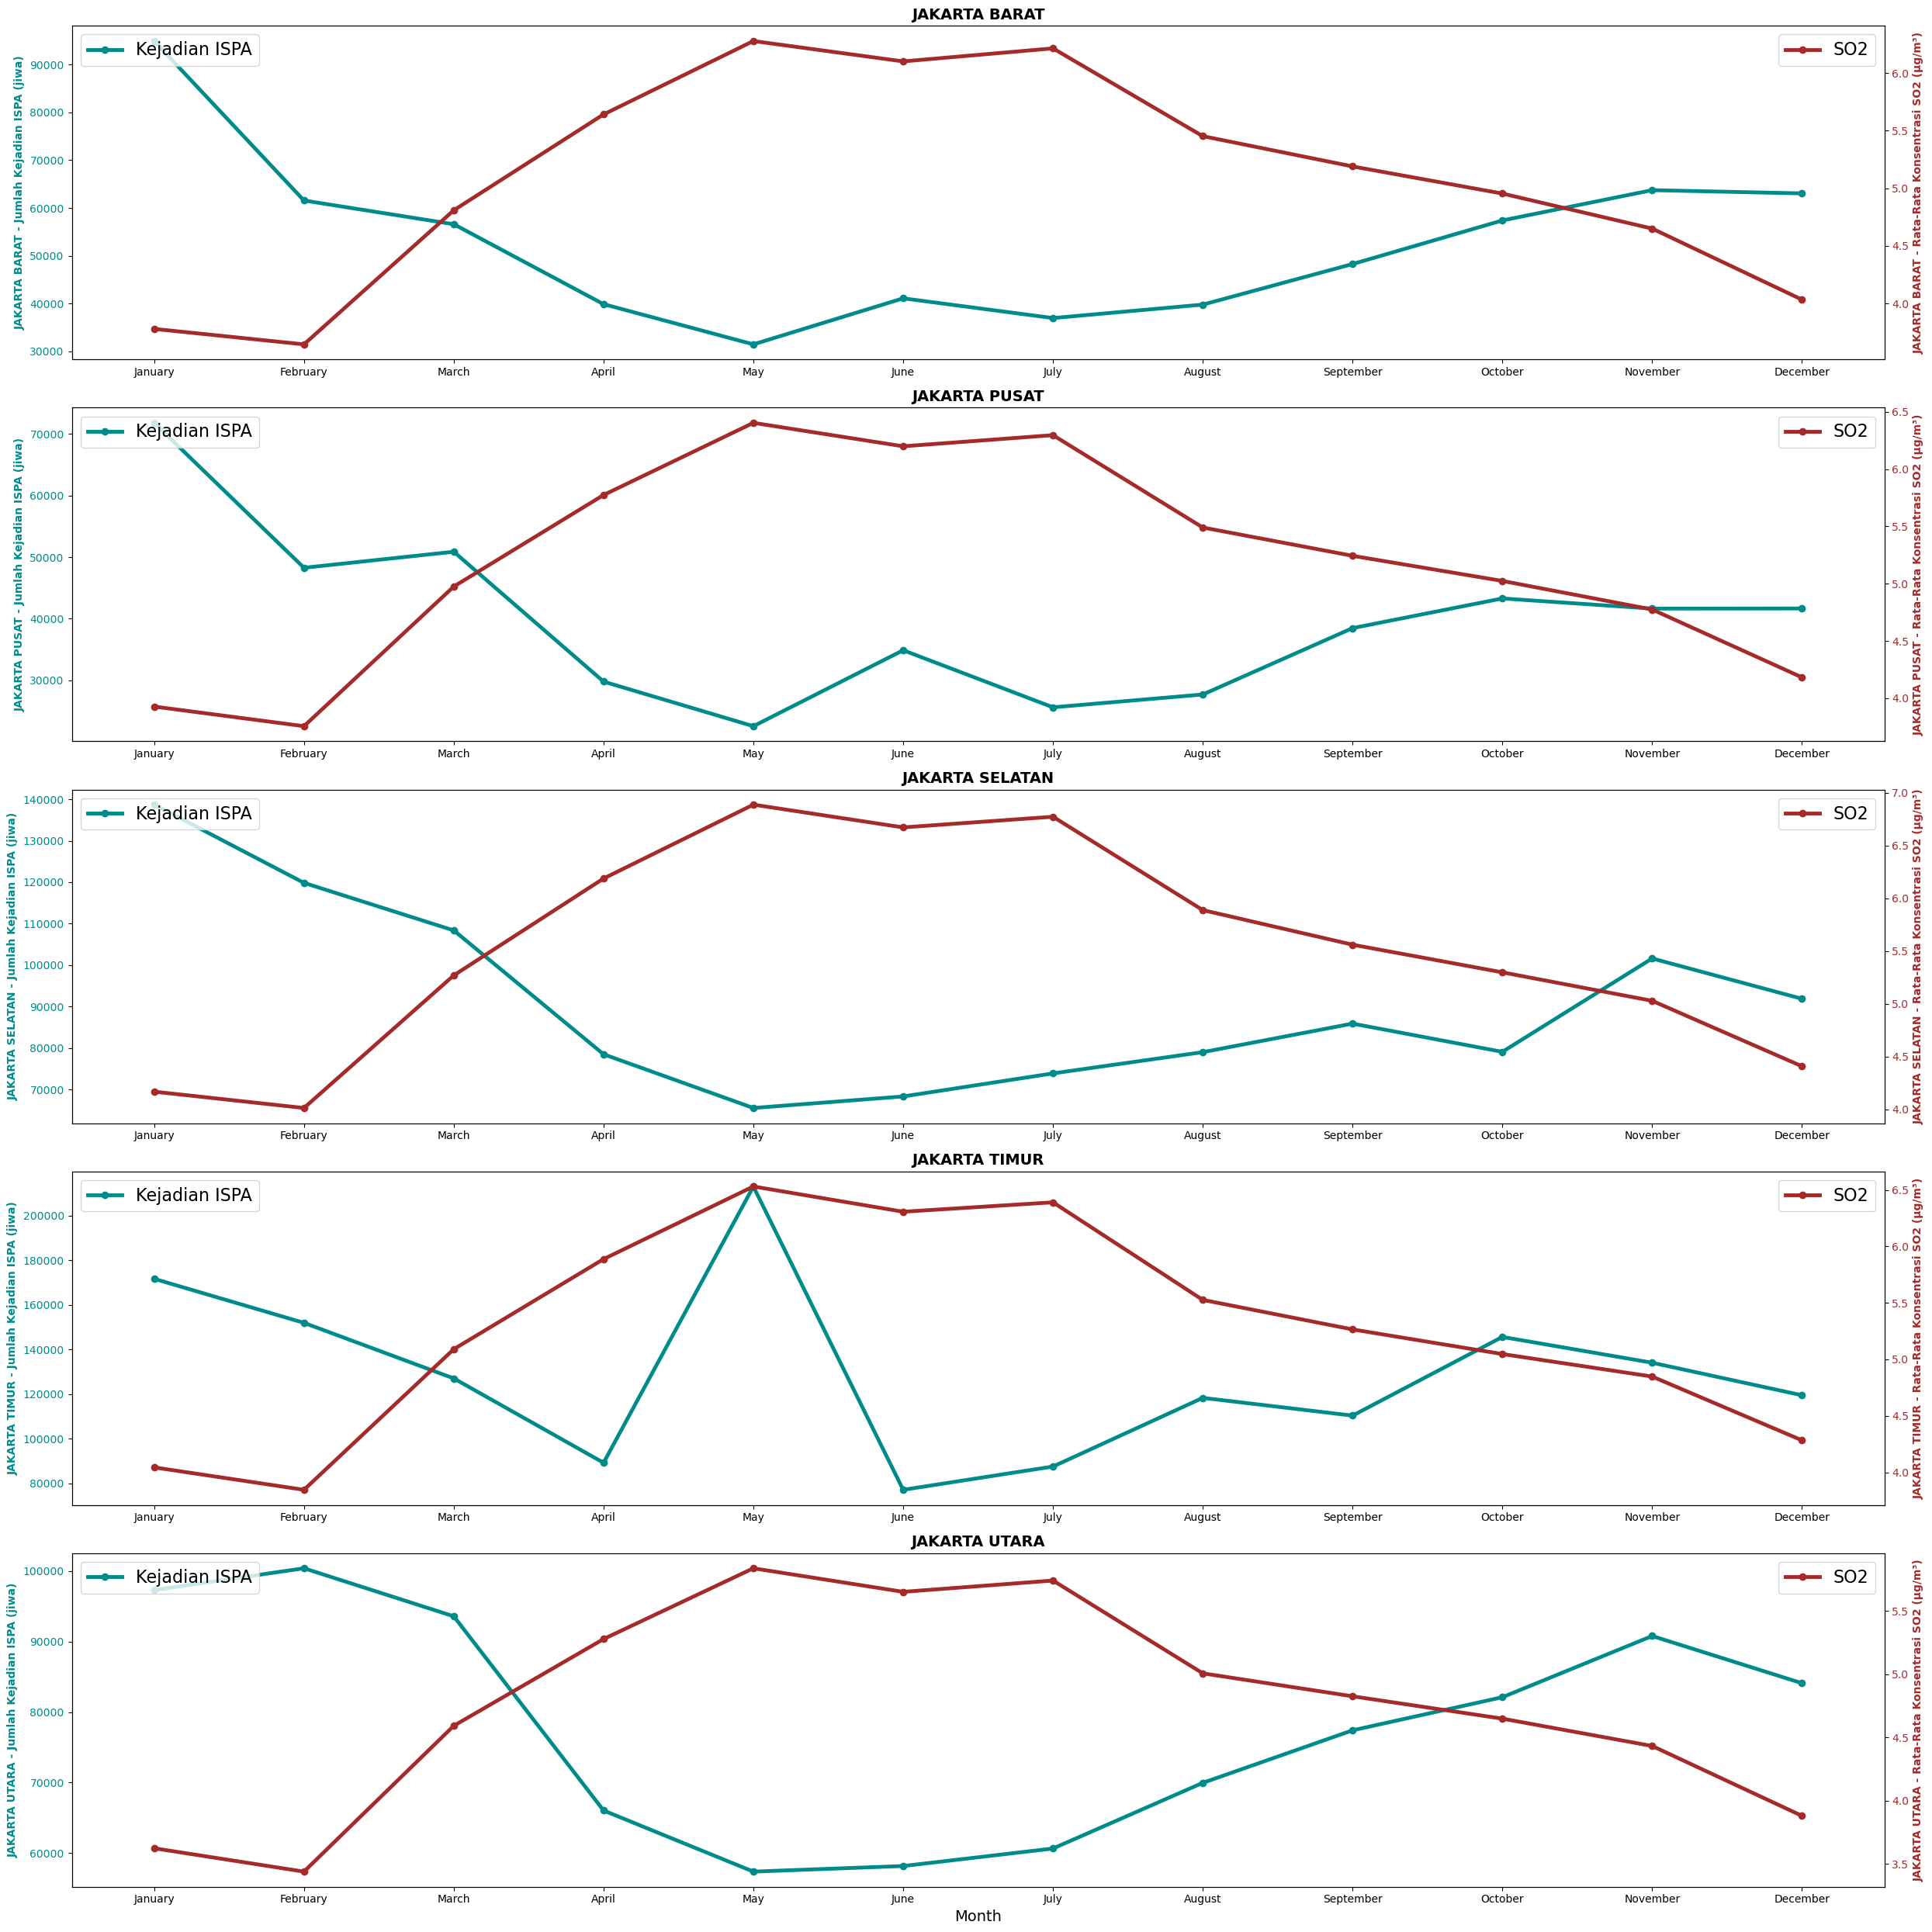

In [50]:
indicators = ['sum_ispa', 'mean_so2']

# Group data by KABKOT
grouped_data = overlay.groupby('KABKOT')

# Plot time series for 'tb' and 'pm2p5' for each KABKOT
fig, axs = plt.subplots(len(grouped_data), 1, figsize=(25, len(grouped_data)*5), sharex=False)


for (name, group), ax in zip(grouped_data, axs):
    x = group['month']
    y1 = group['sum_ispa']
    y2 = group['mean_so2']

    ax.plot(x, y1, label='Kejadian ISPA', marker='o', linewidth=3.5, color='darkcyan')
    ax.set_ylabel(f'{name} - Jumlah Kejadian ISPA (jiwa)', color='darkcyan', weight='bold')
    ax.tick_params(axis='y', labelcolor='darkcyan')

    ax2 = ax.twinx()
    ax2.plot(x, y2, label='SO2', marker='o',linewidth=3.5, color='brown')
    ax2.set_ylabel(f'{name} - Rata-Rata Konsentrasi SO2 (µg/m³)', color='brown', weight='bold')
    ax2.tick_params(axis='y', labelcolor='brown')

    ax.legend(loc= 'upper left', fontsize=16)
    ax2.legend(loc= 'upper right', fontsize=16)

# Add common x-axis label
axs[-1].set_xlabel('Month', fontsize= 14)
axs[-1].set_title('JAKARTA UTARA', weight='bold', fontsize= 14)
axs[-2].set_title('JAKARTA TIMUR', weight='bold', fontsize= 14)
axs[-3].set_title('JAKARTA SELATAN', weight='bold', fontsize= 14)
axs[-4].set_title('JAKARTA PUSAT', weight='bold', fontsize= 14)
axs[-5].set_title('JAKARTA BARAT', weight='bold', fontsize= 14)

plt.tight_layout()
plt.show()